In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Read the dataset

#### Functions for data preprocessing

In [2]:
def check_null_count_percent(data):
    nv = data.isnull().sum()
    nv = nv[nv>0]
    nv_df = pd.DataFrame({'Features':nv.index,'Count':nv.values,
                         'Percent':(nv.values/data.shape[0])*100})
    nv_df = nv_df.sort_values('Percent',ascending=False)
    return nv_df

def drop_redundant_columns(data,col_list):
    print('Before Drop')
    print(data.shape)
    data.drop(col_list,axis=1,inplace=True)
    print('After Drop')
    print(data.shape)
    

def check_duplicates(data):
    if data.duplicated().sum()>0:
        print('Count Duplucates',data.duplicated().sum())
        data.drop_duplicates(inplace=True)
        print('After Dupes Removal',data.shape)
    else:
        print('No Duplicate detected')
    

def cat_num_cols(data):
    num_cols = data.dtypes[data.dtypes!='object'].index
    cat_cols = data.dtypes[data.dtypes=='object'].index
    return num_cols,cat_cols

# cat,num
# univraite, bivaraite

def eda_cat(cat_cols,target,analysis_type=None,ctype=None):
    if analysis_type=='Uni' and ctype==1: # Countplot
        plt.figure(figsize=(12,15))
        for i in range(len(cat_cols)):
            plt.subplot(3,2,i+1)
            ax = sns.countplot(y =df[cat_cols[i]])
            plt.title(f'Countplot for {cat_cols[i]}')
            ax.bar_label(ax.containers[0])
        plt.show()
    elif analysis_type=='Uni' and ctype==2:  # Pie
        plt.figure(figsize=(12,15))
        for i in range(len(cat_cols)):
            plt.subplot(3,2,i+1)
            x = df[cat_cols[i]].value_counts()
            plt.pie(x.values,labels=x.index,autopct='%2.f%%')
            plt.title(f'Pie for {cat_cols[i]}')
        plt.show()
    elif analysis_type=='Bi' and ctype==3: # Boxplot
        plt.figure(figsize=(12,15))
        for i in range(len(cat_cols)):
            plt.subplot(3,2,i+1)
            sns.boxplot(y =df[cat_cols[i]],x=df[target])
            plt.title(f'Boxplot for {cat_cols[i]} wrt {target}')
        plt.show()

        
        
def eda_num(num_cols,target,analysis_type=None,ctype=None):
    if analysis_type=='Uni' and ctype==1: # Histplot
        plt.figure(figsize=(12,15))
        for i in range(len(cat_cols)):
            plt.subplot(4,2,i+1)
            sns.histplot(x =df[num_cols[i]],kde=True)
            plt.title(f'Histplot for {num_cols[i]}')
        plt.show()
    elif analysis_type=='Uni' and ctype==2:  # Boxplot
        plt.figure(figsize=(12,15))
        for i in range(len(num_cols)):
            plt.subplot(4,2,i+1)
            sns.boxplot(x=df[num_cols[i]])
            plt.title(f'Boxplot for {num_cols[i]}')
        plt.show()
    elif analysis_type=='Bi' and ctype==3: # Scatter Chart
        plt.figure(figsize=(12,15))
        for i in range(len(num_cols)):
            plt.subplot(4,2,i+1)
            sns.scatterplot(x =df[num_cols[i]],y=df[target])
            plt.title(f'ScatterpLot for {num_cols[i]} wrt {target}')
        plt.show()
        
        

# def treat_null(nv_df):
#     for i,j in nv_df.

    # Categorical Column => Rules
    # if percent_Null>0 and <=5 => Drop rows
    # if percent_Null>5 and <=20 => Fill with Mode
    # if percent_Null>20 and <=70 => Fill with 'Other'
    # if percent_Null>70 => Drop Column
    
    # Numerical Column => Rules
    # if percent_Null>0 and <=5 => Drop rows
    # if percent_Null>5 and <=70 => Mean/median 
    # if percent_Null>70 => Drop Column
    
    # Proportionate imputation
    
    
# def outlier_treatment(data):


In [3]:
df = pd.read_csv('laptop_price_data.csv')
df.head()

,Unnamed: 0,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,Cpu brand,HDD,SSD,Gpu brand,os
0,0,Apple,Ultrabook,8,1.37,71378.6832,0,1,Intel Core i5,0,128,Intel,Mac
1,1,Apple,Ultrabook,8,1.34,47895.5232,0,0,Intel Core i5,0,0,Intel,Mac
2,2,HP,Notebook,8,1.86,30636.0000,0,0,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,3,Apple,Ultrabook,16,1.83,135195.3360,0,1,Intel Core i7,0,512,AMD,Mac
4,4,Apple,Ultrabook,8,1.37,96095.8080,0,1,Intel Core i5,0,256,Intel,Mac


In [4]:
df['TypeName'].value_counts()

TypeName
Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    120
Workstation            29
Netbook                25
Name: count, dtype: int64

In [9]:
apple = df[(df['Company'] == 'Dell') & (df['TypeName'] == 'Gaming')]
apple

# apple.groupby(['Company', 'Ram'])['Price'].mean()

,Unnamed: 0,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,Cpu brand,HDD,SSD,Gpu brand,os
41,41,Dell,Gaming,16,2.65,79866.7200,0,1,Intel Core i7,1000,256,Nvidia,Windows
85,85,Dell,Gaming,16,2.65,71874.7200,0,1,Intel Core i7,1000,128,Nvidia,Windows
93,93,Dell,Gaming,8,2.65,63669.6000,0,0,Intel Core i5,0,256,Nvidia,Windows
150,150,Dell,Gaming,16,2.56,66560.5728,0,0,Intel Core i7,0,512,Nvidia,Windows
151,151,Dell,Gaming,8,2.62,47898.7200,0,0,Intel Core i7,0,0,Nvidia,Windows
167,167,Dell,Gaming,8,2.56,56502.9072,0,0,Intel Core i7,1000,128,Nvidia,Windows
200,200,Dell,Gaming,16,2.65,98301.6000,0,1,Intel Core i7,1000,512,Nvidia,Windows
224,224,Dell,Gaming,16,4.42,130873.7952,0,1,Intel Core i7,1000,256,Nvidia,Windows
243,243,Dell,Gaming,8,2.56,46833.1200,0,0,Intel Core i5,0,256,Nvidia,Windows
357,357,Dell,Gaming,8,2.65,53226.7200,0,0,Intel Core i5,1000,0,Nvidia,Windows


In [123]:
df.groupby('TypeName')['Company'].unique()

TypeName
2 in 1 Convertible    [Dell, Lenovo, Acer, HP, Asus, Mediacom, Samsung]
Gaming                       [Lenovo, Dell, Asus, MSI, HP, Razer, Acer]
Netbook                         [Asus, Lenovo, Samsung, Acer, Dell, HP]
Notebook              [HP, Acer, Dell, Lenovo, Chuwi, Asus, Toshiba,...
Ultrabook             [Apple, Asus, Acer, Dell, HP, Microsoft, Huawe...
Workstation                                          [Dell, HP, Lenovo]
Name: Company, dtype: object

In [115]:
df.groupby('Company')['Ram'].unique()


Company
Acer                     [4, 8, 6, 12, 2, 16]
Apple                              [8, 16, 4]
Asus         [16, 2, 4, 8, 12, 6, 32, 24, 64]
Chuwi                                  [4, 6]
Dell                 [4, 8, 16, 12, 6, 32, 2]
Fujitsu                                [8, 4]
Google                                [16, 8]
HP                       [8, 4, 16, 12, 6, 2]
Huawei                                    [8]
LG                                    [8, 16]
Lenovo           [8, 4, 16, 6, 12, 2, 24, 32]
MSI                               [16, 8, 32]
Mediacom                               [4, 2]
Microsoft                          [4, 8, 16]
Razer                             [32, 16, 8]
Samsung                            [4, 16, 8]
Toshiba                        [4, 8, 16, 32]
Vero                                   [4, 2]
Xiaomi                                [8, 16]
Name: Ram, dtype: object

In [93]:
df['Company'].value_counts()

Company
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        8
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64

In [109]:
df[df['Company']=='Apple']['Price'].max()

152274.24

In [99]:
pri= df[df['Company']=='Asus'][['Company', 'Price']]

In [110]:
lapi = ['Apple', 'Dell', 'HP', 'Asus']

for i in lapi:
    price = df[df['Company']==i]['Price'].max()

    print(f"{i} is {price} $")

Apple is 152274.24 $
Dell is 194972.832 $
HP is 233845.92 $
Asus is 211788.0 $


In [100]:
df['Company'].value_counts()

Company
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        8
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64

In [77]:
nv_df = check_null_count_percent(df)
nv_df

,Features,Count,Percent


In [78]:
check_duplicates(df)

No Duplicate detected


In [79]:
df.columns

Index(['Unnamed: 0', 'Company', 'TypeName', 'Ram', 'Weight', 'Price',
       'Touchscreen', 'Ips', 'Cpu brand', 'HDD', 'SSD', 'Gpu brand', 'os'],
      dtype='object')

In [80]:
col_drop_list = ['Unnamed: 0']

In [81]:
drop_redundant_columns(df,col_drop_list)

Before Drop
(1302, 13)
After Drop
(1302, 12)


In [82]:
num_cols,cat_cols = cat_num_cols(df)
print(num_cols)
print(cat_cols)

Index(['Ram', 'Weight', 'Price', 'Touchscreen', 'Ips', 'HDD', 'SSD'], dtype='object')
Index(['Company', 'TypeName', 'Cpu brand', 'Gpu brand', 'os'], dtype='object')


In [83]:
print(len(cat_cols))

5


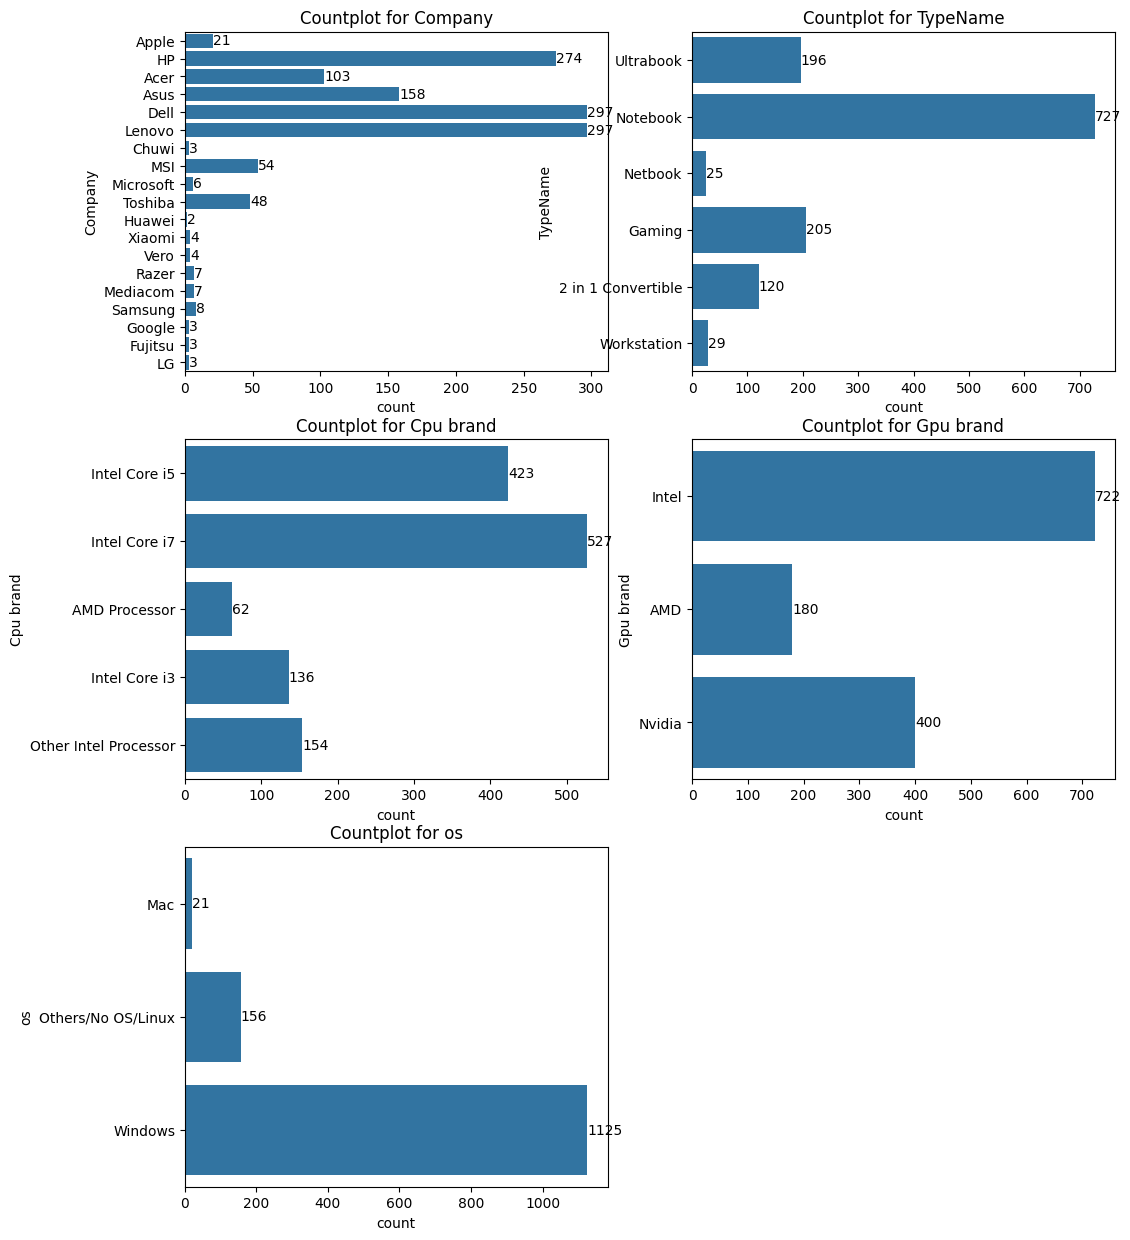

In [84]:
eda_cat(cat_cols,'Price',analysis_type='Uni',ctype=1)

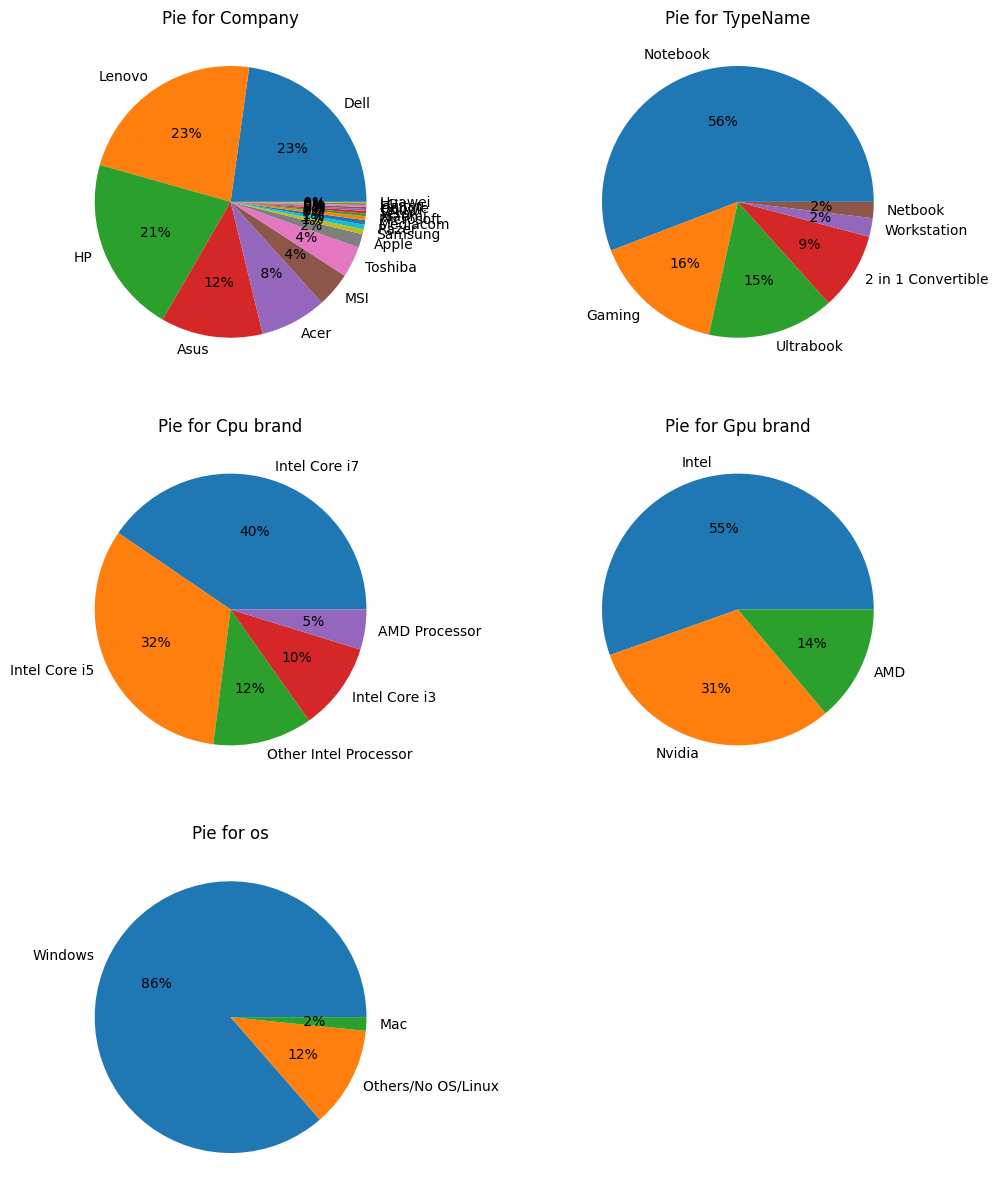

In [85]:
eda_cat(cat_cols,'Price',analysis_type='Uni',ctype=2)

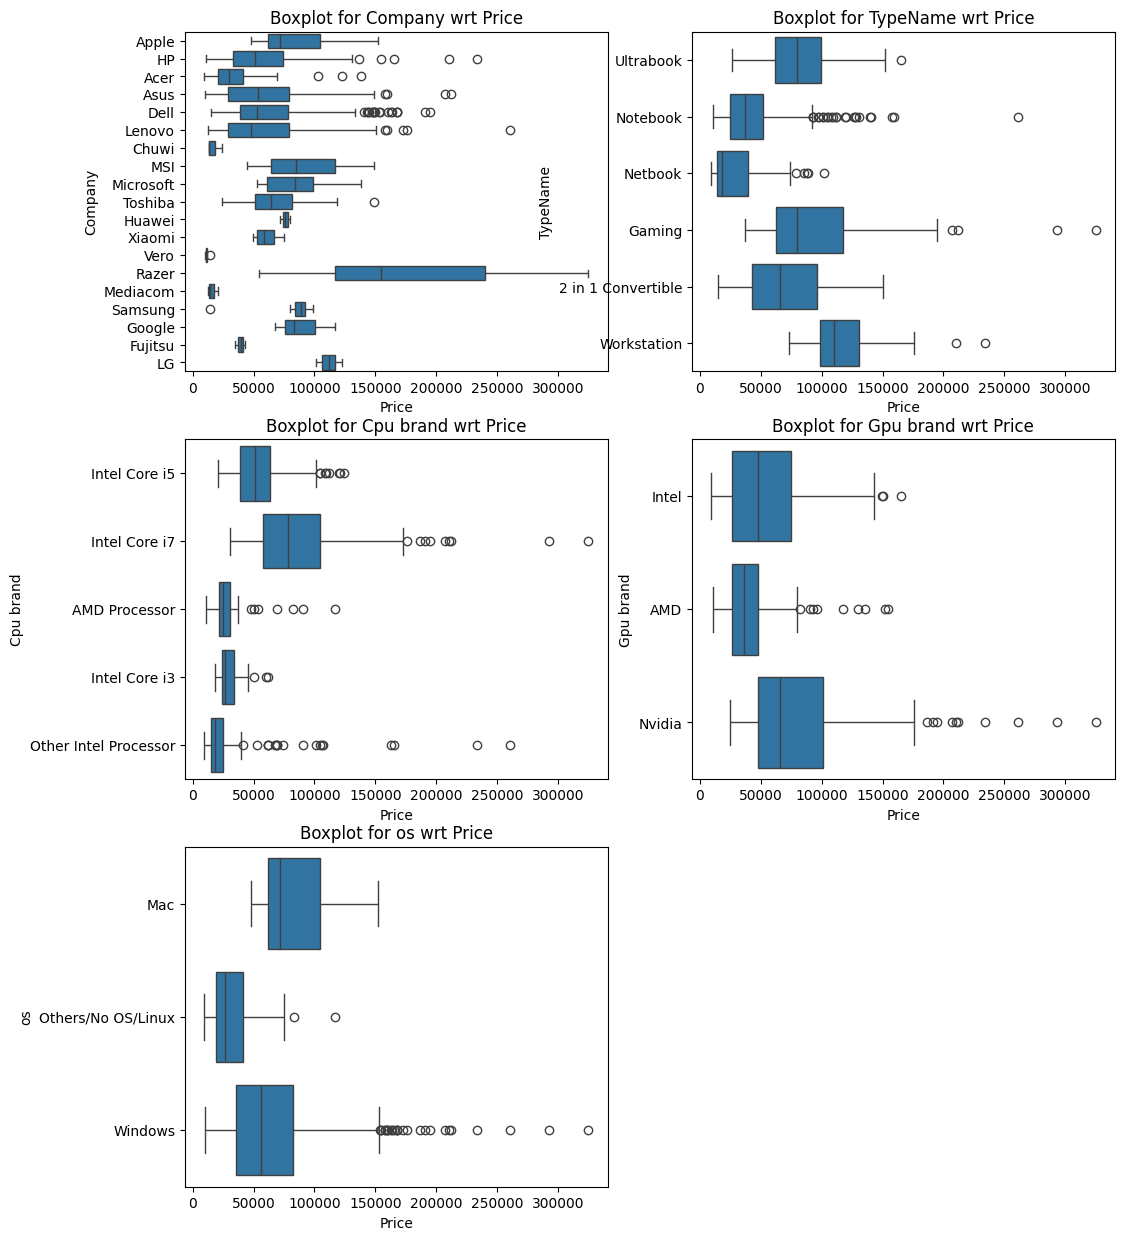

In [86]:
eda_cat(cat_cols,'Price',analysis_type='Bi',ctype=3)

In [87]:
num_cols

Index(['Ram', 'Weight', 'Price', 'Touchscreen', 'Ips', 'HDD', 'SSD'], dtype='object')

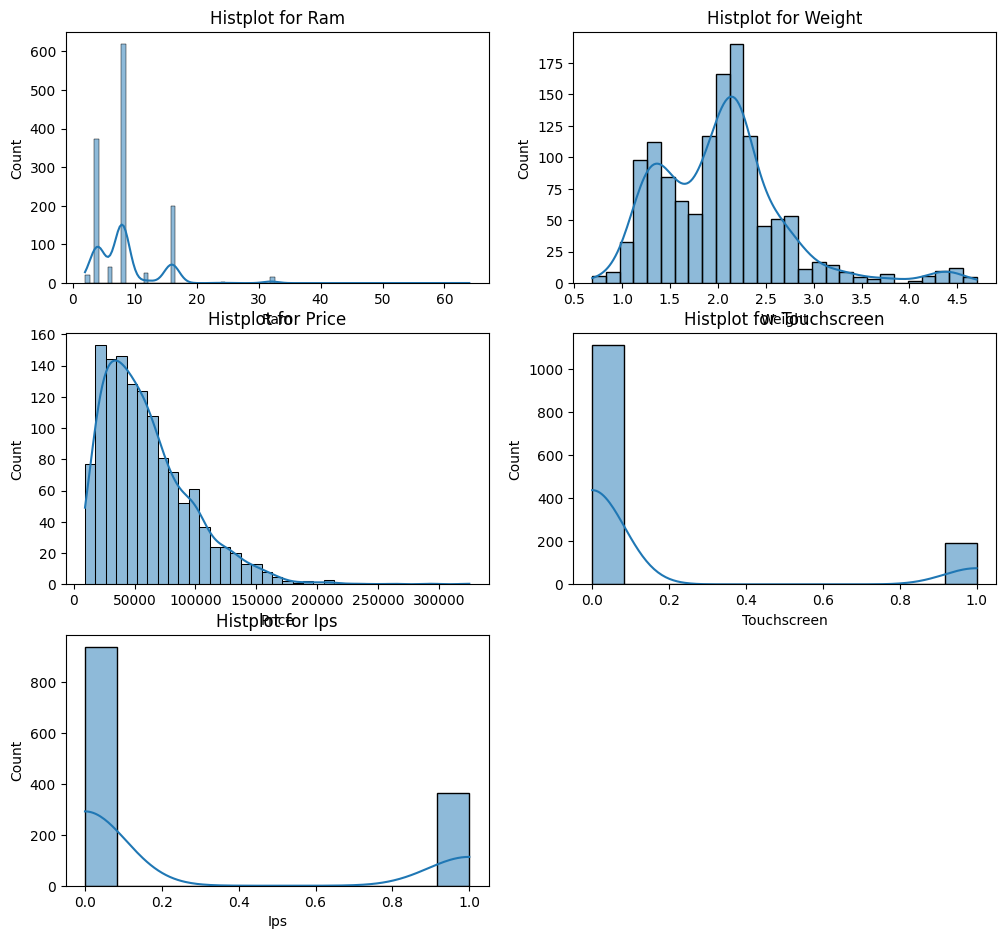

In [88]:
eda_num(num_cols,'Price',analysis_type='Uni',ctype=1)

In [89]:
eda_num(num_cols,'Price',analysis_type='Uni',ctype=2)

KeyboardInterrupt: 

#### Outlier Treatment

In [ ]:
a1 = df[['Weight','Price']].describe(percentiles=[0.95,0.96,0.97,0.98,0.99]).T
a1 = a1.iloc[:,3:]
a1

,min,50%,95%,96%,97%,98%,99%,max
Weight,0.69,2.04,3.200,3.35000,3.7800,4.298000,4.420000,4.70
Price,9270.72,52107.84,130472.064,135134.70336,144474.5808,152848.076256,167777.851536,324954.72


In [ ]:
df1 = df.copy()

In [ ]:
df['Price'] = np.where(df['Price']>167777.851536,167777.851536,df['Price'])
df['Weight'] = np.where(df['Weight']>4.298000,4.298000,df['Weight'])

In [ ]:
a1 = df[['Weight','Price']].describe(percentiles=[0.95,0.96,0.97,0.98,0.99]).T
a1 = a1.iloc[:,3:]
a1

,min,50%,95%,96%,97%,98%,99%,max
Weight,0.69,2.04,3.200,3.35000,3.7800,4.296040,4.298000,4.298000
Price,9270.72,52107.84,130472.064,135134.70336,144474.5808,152848.076256,167776.991757,167777.851536


#### Encoding

In [ ]:
cat_cols

Index(['Company', 'TypeName', 'Cpu brand', 'Gpu brand', 'os'], dtype='object')

In [ ]:
for i in cat_cols:
    print(i,df[i].nunique())

Company 19
TypeName 6
Cpu brand 5
Gpu brand 3
os 3


In [ ]:
for i in cat_cols:
    print(i)
    print(df[i].value_counts())

Company
Company
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        8
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64
TypeName
TypeName
Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    120
Workstation            29
Netbook                25
Name: count, dtype: int64
Cpu brand
Cpu brand
Intel Core i7            527
Intel Core i5            423
Other Intel Processor    154
Intel Core i3            136
AMD Processor             62
Name: count, dtype: int64
Gpu brand
Gpu brand
Intel     722
Nvidia    400
AMD       180
Name: count, dtype: int64
os
os
Windows               1125
Others/No OS/Linux     156
Mac                     21
Name: count, dtype: int64


In [ ]:
comp_map = {'Samsung':'Other','Razer':'Other','Mediacom':'Other','Microsoft':'Other',
           'Xiaomi':'Other','Vero':'Other','Google':'Other','LG':'Other','Chuwi':'Other',
           'Fujitsu':'Other','Huawei':'Other'} 
df['Company'] = df['Company'].replace(comp_map)

In [ ]:
df['Company'].value_counts()

Company
Dell       297
Lenovo     297
HP         274
Asus       158
Acer       103
MSI         54
Other       50
Toshiba     48
Apple       21
Name: count, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
lb = LabelEncoder()

In [ ]:
for i in cat_cols:
    df[i] = lb.fit_transform(df[i])

In [ ]:
df.dtypes

Company          int32
TypeName         int32
Ram              int64
Weight         float64
Price          float64
Touchscreen      int64
Ips              int64
Cpu brand        int32
HDD              int64
SSD              int64
Gpu brand        int32
os               int32
dtype: object

#### Select x and y

In [ ]:
df.dtypes

Company          int32
TypeName         int32
Ram              int64
Weight         float64
Price          float64
Touchscreen      int64
Ips              int64
Cpu brand        int32
HDD              int64
SSD              int64
Gpu brand        int32
os               int32
dtype: object

In [ ]:
x = df.drop('Price',axis=1)
y = df['Price']
print(x.shape)
print(y.shape)

(1302, 11)
(1302,)


#### Split data into train and test

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)


In [ ]:
print(type(x_train))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
x_train.describe()


,Company,TypeName,Ram,Weight,Touchscreen,Ips,Cpu brand,HDD,SSD,Gpu brand,os
count,911.000000,911.000000,911.000000,911.000000,911.000000,911.000000,911.00000,911.000000,911.000000,911.000000,911.000000
mean,3.763996,2.607025,8.419319,2.029990,0.141603,0.284303,2.43798,410.129528,183.271131,1.156970,1.839737
std,1.838615,1.226679,5.094688,0.649738,0.348834,0.451330,1.00233,507.667050,182.064244,0.651754,0.414837
min,0.000000,0.000000,2.000000,0.690000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,4.000000,1.500000,0.000000,0.000000,2.00000,0.000000,0.000000,1.000000,2.000000
50%,4.000000,3.000000,8.000000,2.040000,0.000000,0.000000,3.00000,0.000000,256.000000,1.000000,2.000000
75%,5.000000,3.000000,8.000000,2.300000,0.000000,1.000000,3.00000,1000.000000,256.000000,2.000000,2.000000
max,8.000000,5.000000,64.000000,4.298000,1.000000,1.000000,4.00000,2000.000000,1000.000000,2.000000,2.000000


#### Model Evaluation Function

In [ ]:
from sklearn.metrics import *

In [ ]:
def eval_model(model,mname):
    model.fit(x_train,y_train)
    ypred = model.predict(x_test)
    train_r2 = model.score(x_train,y_train) 
    test_r2 = model.score(x_test,y_test)
    mae = mean_absolute_error(y_test,ypred)
    mse = mean_squared_error(y_test,ypred)
    rmse = np.sqrt(mse)
    res = pd.DataFrame({'Train_R2':train_r2,'Test_R2':test_r2,'MAE':mae,
                       'MSE':mse,'RMSE':rmse},index=[mname])
    return res,ypred

#### Import ML Model

In [ ]:
from sklearn.linear_model import *
from sklearn.tree import *
from sklearn.ensemble import *
from sklearn.neighbors import *
from xgboost import XGBRegressor

#### 1) LinReg

In [ ]:
lr1 = LinearRegression()
lr1_res,ypred_lr1 = eval_model(lr1,'LinReg')
lr1_res

,Train_R2,Test_R2,MAE,MSE,RMSE
LinReg,0.658105,0.637364,16110.524424,4.605928e+08,21461.425285


#### 2) DT Reg

In [ ]:
dt1 = DecisionTreeRegressor(max_depth=6,min_samples_split=8)
dt1_res,ypred_dt1 = eval_model(dt1,'DT_Reg')
dt1_res

,Train_R2,Test_R2,MAE,MSE,RMSE
DT_Reg,0.808807,0.72727,12729.616416,3.464014e+08,18611.862163


#### 3) KNN Reg

In [ ]:
knn1 = KNeighborsRegressor(n_neighbors=11)
knn1_res,ypred_knn1 = eval_model(knn1,'KNN_Reg')
knn1_res

,Train_R2,Test_R2,MAE,MSE,RMSE
KNN_Reg,0.750057,0.698308,13872.644863,3.831858e+08,19575.132912


#### 4) RandomForest Reg

In [ ]:
rf1 = RandomForestRegressor(n_estimators=80,max_depth=6,min_samples_split=8)
rf1_res,ypred_rf1 = eval_model(rf1,'RF_Reg')
rf1_res

,Train_R2,Test_R2,MAE,MSE,RMSE
RF_Reg,0.834597,0.777023,11688.275174,2.832085e+08,16828.79878


In [ ]:
rf_pred_res = pd.DataFrame({'Actual':y_test,'pred':ypred_rf1})
rf_pred_res.head(10)

,Actual,pred
478,35964.0000,43850.067421
724,71847.0144,57497.775360
312,111834.7200,94169.846932
851,101178.7200,91526.260747
1275,24455.5200,27184.906843
115,74538.1872,78035.233241
816,95850.7200,106287.637737
722,79866.7200,79350.277130
1142,86793.1200,71204.574139
101,18594.7200,26176.750463


#### 5) XGBoost

In [ ]:
xgb1 = XGBRegressor(gamma=0.1,reg_lambda=0.1,reg_alpha=0.1)
xgb1_res,ypred_xgb = eval_model(xgb1,'XGBReg')
xgb1_res

,Train_R2,Test_R2,MAE,MSE,RMSE
XGBReg,0.985885,0.799308,10308.69762,2.549036e+08,15965.69957


In [ ]:
all_res  = pd.concat([lr1_res,dt1_res,knn1_res,rf1_res,xgb1_res])
all_res

,Train_R2,Test_R2,MAE,MSE,RMSE
LinReg,0.658105,0.637364,16110.524424,4.605928e+08,21461.425285
DT_Reg,0.808807,0.727270,12729.616416,3.464014e+08,18611.862163
KNN_Reg,0.750057,0.698308,13872.644863,3.831858e+08,19575.132912
RF_Reg,0.834597,0.777023,11688.275174,2.832085e+08,16828.798780
XGBReg,0.985885,0.799308,10308.697620,2.549036e+08,15965.699570


In [ ]:
#### Hyperparamter Tuning
# a) GridSearchCV
# b) RadomizedSearchCV

#### Model Save

In [ ]:
import pickle

In [ ]:
pickle.dump(rf1,open('rf1_28July.sav','wb'))
pickle.dump(xgb1,open('xgb1_28July.sav','wb'))

In [ ]:
x_train.columns

Index(['Company', 'TypeName', 'Ram', 'Weight', 'Touchscreen', 'Ips',
       'Cpu brand', 'HDD', 'SSD', 'Gpu brand', 'os'],
      dtype='object')

In [ ]:
x_train.head()

,Company,TypeName,Ram,Weight,Touchscreen,Ips,Cpu brand,HDD,SSD,Gpu brand,os
1122,4,3,8,1.43,0,0,2,0,256,1,2
438,5,4,24,1.32,0,0,3,0,512,1,2
579,3,3,8,2.20,0,0,3,0,256,0,1
842,4,3,8,2.63,0,0,2,1000,0,2,2
1161,6,1,16,1.70,0,0,3,1000,256,2,2


In [ ]:
x_train['HDD'].value_counts().sort_index()

HDD
0       508
128       1
500      95
1000    288
2000     19
Name: count, dtype: int64

In [ ]:
x_train['SSD'].value_counts().sort_index()

SSD
0       317
8         1
16        1
32        3
64        1
128     127
180       4
256     347
512     100
768       1
1000      9
Name: count, dtype: int64

In [ ]:
x_train['Ram'].value_counts().sort_index()

Ram
2      12
4     271
6      29
8     417
12     17
16    153
24      2
32      9
64      1
Name: count, dtype: int64

In [ ]:
x_train.describe()

,Company,TypeName,Ram,Weight,Touchscreen,Ips,Cpu brand,HDD,SSD,Gpu brand,os
count,911.000000,911.000000,911.000000,911.000000,911.000000,911.000000,911.00000,911.000000,911.000000,911.000000,911.000000
mean,3.763996,2.607025,8.419319,2.029990,0.141603,0.284303,2.43798,410.129528,183.271131,1.156970,1.839737
std,1.838615,1.226679,5.094688,0.649738,0.348834,0.451330,1.00233,507.667050,182.064244,0.651754,0.414837
min,0.000000,0.000000,2.000000,0.690000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,4.000000,1.500000,0.000000,0.000000,2.00000,0.000000,0.000000,1.000000,2.000000
50%,4.000000,3.000000,8.000000,2.040000,0.000000,0.000000,3.00000,0.000000,256.000000,1.000000,2.000000
75%,5.000000,3.000000,8.000000,2.300000,0.000000,1.000000,3.00000,1000.000000,256.000000,2.000000,2.000000
max,8.000000,5.000000,64.000000,4.298000,1.000000,1.000000,4.00000,2000.000000,1000.000000,2.000000,2.000000


In [ ]:
df['Company'].value_counts()

Company
3    297
5    297
4    274
2    158
0    103
6     54
7     50
8     48
1     21
Name: count, dtype: int64

In [ ]:
# Dell       297
# Lenovo     297
# HP         274
# Asus       158
# Acer       103
# MSI         54
# Other       50
# Toshiba     48
# Apple       21

In [ ]:
x_train['TypeName'].value_counts()

TypeName
3    508
4    145
1    143
0     78
2     19
5     18
Name: count, dtype: int64

In [ ]:
df['TypeName'].value_counts()

TypeName
3    727
1    205
4    196
0    120
5     29
2     25
Name: count, dtype: int64

In [ ]:
# Notebook              727
# Gaming                205
# Ultrabook             196
# 2 in 1 Convertible    120
# Workstation            29
# Netbook                25